# Importing Libraries and Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns',200)
%matplotlib inline

In [ ]:
#Loading the data
path="/content/drive/MyDrive/For_modeling.csv"

In [ ]:
data = pd.read_csv(path,index_col=0).sample(frac=1)

#checking for data
data.head(10)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9470687,7,1060,37.560242,126.827164,37.558910,126.838097,0.975022,12,7,14,47,4,12,7,14,55,4,-5.2,0.0,5.0,23.0,1.72,0.0,1.2,11.0
1227592,2,620,37.485828,126.982628,37.489586,126.986725,0.552528,4,24,9,0,1,4,24,9,3,1,12.0,0.0,1.4,71.0,0.92,0.0,15.7,4.0
5834959,18,2420,37.513962,127.121674,37.530773,127.120926,1.870464,9,6,19,10,3,9,6,19,28,3,25.3,0.0,3.3,71.0,0.05,0.0,24.2,18.0
4211111,45,10700,37.582592,127.028976,37.531860,127.067192,6.570449,7,20,19,11,4,7,20,19,58,4,32.9,0.0,2.0,44.0,0.59,0.0,33.1,23.0
1351903,14,1950,37.561096,127.036797,37.560474,127.014076,2.003939,4,28,11,56,5,4,28,12,12,5,19.0,0.0,3.0,30.0,2.84,0.0,34.7,74.0
4387713,40,4090,37.550079,127.146912,37.545399,127.142601,0.644402,7,25,21,13,2,7,25,21,53,2,29.7,0.0,2.2,74.0,0.00,0.0,29.2,32.0
8591067,12,2570,37.493618,127.014183,37.490551,127.031464,1.562316,11,5,19,2,0,11,5,19,15,0,13.2,0.0,1.7,66.0,0.00,0.0,10.7,57.0
5283093,34,1220,37.556004,126.942299,37.555496,126.936340,0.528321,8,21,13,21,1,8,21,13,56,1,27.1,0.0,2.6,66.0,1.54,0.0,32.7,13.0
3007975,43,10260,37.516598,127.009590,37.508339,127.088142,6.989062,6,17,17,28,6,6,17,18,12,6,25.6,0.0,3.3,58.0,0.66,0.0,28.9,38.0
5560002,3,460,37.566223,126.983589,37.569836,126.982658,0.410042,8,31,9,17,4,8,31,9,22,4,24.1,0.0,0.9,69.0,0.76,0.0,26.5,28.0


In [ ]:
data = data.reset_index().drop(columns=['index'])
data.head(10)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,7,1060,37.560242,126.827164,37.558910,126.838097,0.975022,12,7,14,47,4,12,7,14,55,4,-5.2,0.0,5.0,23.0,1.72,0.0,1.2,11.0
1,2,620,37.485828,126.982628,37.489586,126.986725,0.552528,4,24,9,0,1,4,24,9,3,1,12.0,0.0,1.4,71.0,0.92,0.0,15.7,4.0
2,18,2420,37.513962,127.121674,37.530773,127.120926,1.870464,9,6,19,10,3,9,6,19,28,3,25.3,0.0,3.3,71.0,0.05,0.0,24.2,18.0
3,45,10700,37.582592,127.028976,37.531860,127.067192,6.570449,7,20,19,11,4,7,20,19,58,4,32.9,0.0,2.0,44.0,0.59,0.0,33.1,23.0
4,14,1950,37.561096,127.036797,37.560474,127.014076,2.003939,4,28,11,56,5,4,28,12,12,5,19.0,0.0,3.0,30.0,2.84,0.0,34.7,74.0
5,40,4090,37.550079,127.146912,37.545399,127.142601,0.644402,7,25,21,13,2,7,25,21,53,2,29.7,0.0,2.2,74.0,0.00,0.0,29.2,32.0
6,12,2570,37.493618,127.014183,37.490551,127.031464,1.562316,11,5,19,2,0,11,5,19,15,0,13.2,0.0,1.7,66.0,0.00,0.0,10.7,57.0
7,34,1220,37.556004,126.942299,37.555496,126.936340,0.528321,8,21,13,21,1,8,21,13,56,1,27.1,0.0,2.6,66.0,1.54,0.0,32.7,13.0
8,43,10260,37.516598,127.009590,37.508339,127.088142,6.989062,6,17,17,28,6,6,17,18,12,6,25.6,0.0,3.3,58.0,0.66,0.0,28.9,38.0
9,3,460,37.566223,126.983589,37.569836,126.982658,0.410042,8,31,9,17,4,8,31,9,22,4,24.1,0.0,0.9,69.0,0.76,0.0,26.5,28.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


Shape of df is 9,601,139 rows and 25 columns.

- The column names and their respective meanings are listed as follows:
  
  1. Duration: Trip Duration
  2. Distance: Trip Distance
  3. PLong: Longitude of the pickup location
  4. PLatd: Latitude of the pickup location
  5. DLong: Longitude of the dropoff location
  6. DLatd: Latitude of the dropoof location
  7. Haversine: Haversine distance calculated from longittude and lattitude
  8. Pmonth: Pickup Month
  9. Pday: Pickup Day
  10. Phour: Pickup Hour
  11. Pmin: Pickup minute
  12. PDweek: Pickup day of the week
  13. Dmonth: Dropoff month
  14. Dday: Dropoff day
  15. Dhour: Dropoff hour
  16. Dmin: Dropoff minute
  17. DDweek: Dropoff day of the week
  18. Temp: Temperature
  19. Precip: Precipitation
  20. Wind: Windspeed
  21. Humid: Humidity
  22. Solar: Solar radiation
  23. Snow: Snowfall
  24. GroundTemp: Ground Temperature
  25. Dust: 1 hour average fine dust concentration


# Preprocessing and EDA

In [ ]:
#Checking for Null values
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


As we can see, there are no null values in any of the columns.

In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


Observing the above cells and their outputs, we can see a few things:

1)There are data points where Haversine value is zero. These can be very short or cancelled trips.

2)There are data points where the Distance is negative.

In [ ]:
# Exploring the data point where haversine value are zeros
data[data['Haversine']==0].shape

(955083, 25)

In [ ]:
#checking where some haversine are zeros
data[data['Haversine']==0].reset_index().drop(columns=['index']).head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,82,11500,37.526989,126.932098,37.526989,126.932098,0.0,5,15,17,11,1,5,15,18,39,1,28.5,0.0,1.7,43.0,1.06,0.0,32.4,53.0
1,60,12340,37.660000,127.072968,37.660000,127.072968,0.0,10,7,11,52,6,10,7,12,53,6,19.1,0.0,2.4,56.0,2.15,0.0,23.4,40.0
2,91,18130,37.602077,127.079582,37.602077,127.079582,0.0,5,9,10,24,2,5,9,11,56,2,16.1,0.0,1.4,43.0,2.41,0.0,30.0,63.0
3,48,6220,37.505135,126.852760,37.505135,126.852760,0.0,8,25,17,42,5,8,25,18,31,5,26.9,0.0,2.8,60.0,0.77,0.0,27.3,13.0
4,27,3190,37.524063,126.875580,37.524063,126.875580,0.0,5,5,16,51,5,5,5,16,51,5,23.2,0.0,4.5,30.0,1.49,0.0,30.5,49.0


In [ ]:
count = ((data['Haversine'] == 0) & (data['PLong'] != data['DLong']) & (data['PLatd'] != data['DLatd'])).sum()
print(f"Total data points with unequal latitude and longitude: {count}")

Total data points with unequal latitude and longitude: 0


So for no data point, is the PLong/Platd equal to DLong/DLatd. This means that the pickup and dropoff locations for no trip are the same.

So for Haversine to be zero is an error. So we can simply drop those points, if they do not constitute a majority of our data.

In [ ]:
#Dropping value with haversine == 0
data= data[data['Haversine']!=0].reset_index().drop(columns=['index'])
data.shape

(8646056, 25)

In [ ]:
#Exploring the data points where Distance is negative
data[data['Distance']<0].shape
#data[data['Distance']<0].head()

(0, 25)

So all points with negative distances have already been handled while dropping points with zero Haversine.

In [ ]:
data[data['Distance']==0].shape

(0, 25)

# Visualization

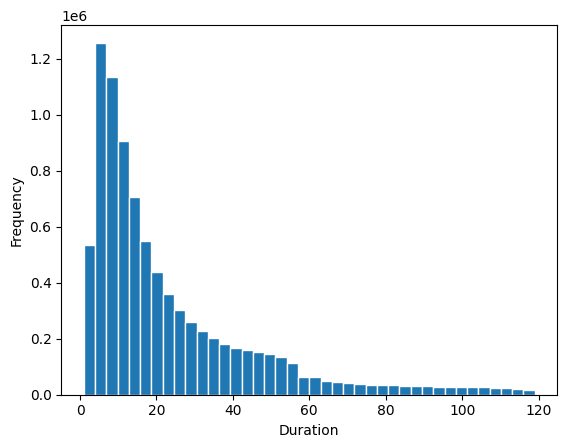

In [18]:
#Histogram of 'Duration'
plt.hist(data['Duration'],ec='white',bins=40)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

The distribution is right skewed

<Axes: xlabel='Distance'>

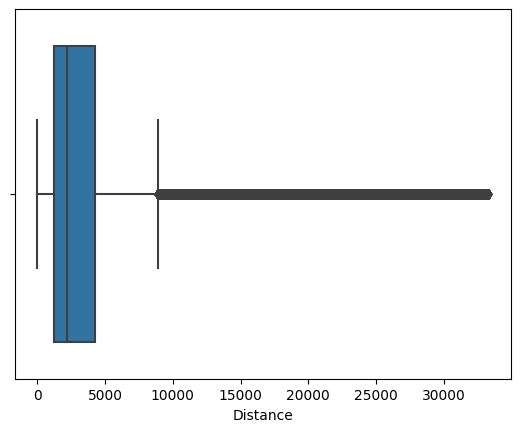

In [ ]:
sns.boxplot(x=data['Distance'])

<Axes: xlabel='Duration'>

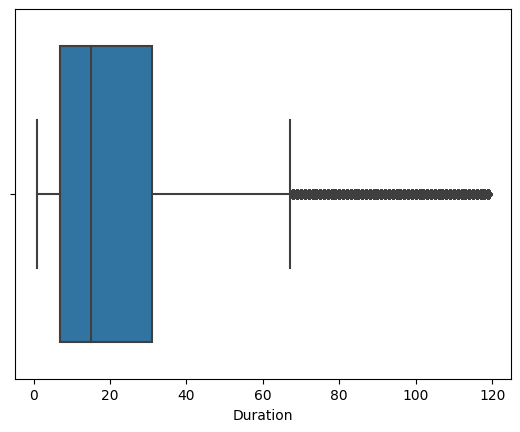

In [ ]:
sns.boxplot(x=data['Duration'])

In [ ]:
# Removing outliers based on the boxplot
m = np.mean(data['Distance'])
s = np.std(data['Distance'])
data = data[data['Distance'] <= m + 3*s]
data = data[data['Distance'] >= m - 3*s]

In [ ]:
data.shape

(8449661, 25)

In [ ]:
m = np.mean(data['Duration'])
s = np.std(data['Duration'])
data = data[data['Duration'] <= m + 3*s]
data = data[data['Duration'] >= m - 3*s]
data.shape

(8247537, 25)

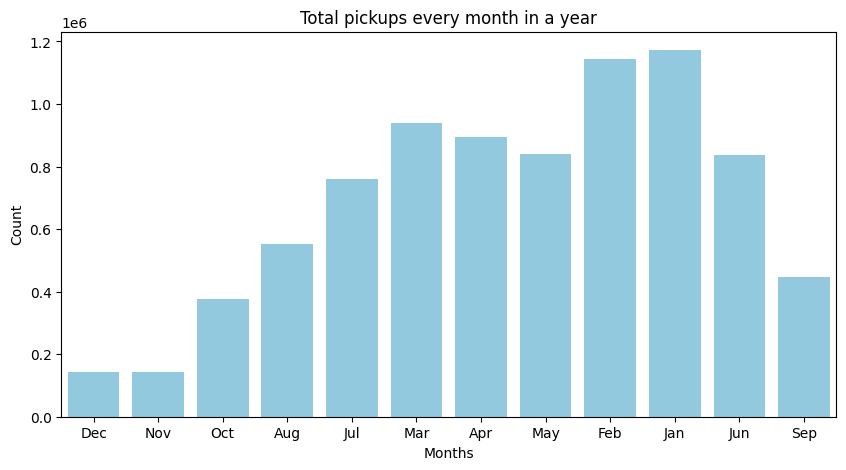

In [ ]:
# Total pickups every month in a year
temp =data['Pmonth'].value_counts()
month_lables = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pick_up_months = temp.index
trips_count = temp.values

plt.figure(figsize=(10,5))
sns.barplot(x=pick_up_months, y=trips_count,color='skyblue')
plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(pick_up_months-1, month_lables)
plt.title("Total pickups every month in a year")
plt.show()

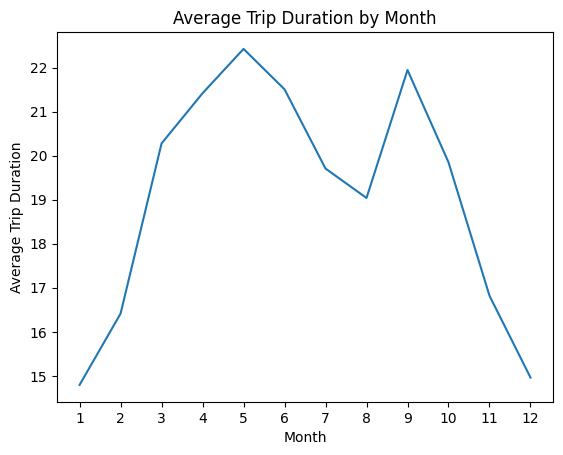

In [ ]:
#Average Trip Duration by Month
average_duration = data.groupby('Pmonth')['Duration'].mean()

# Create the line chart
plt.plot(average_duration.index, average_duration.values, )
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.xticks(average_duration.index)
plt.show()

PDweek
0    19.052123
1    18.986756
2    19.048176
3    18.496546
4    19.069267
5    22.466541
6    22.712040
Name: Duration, dtype: float64


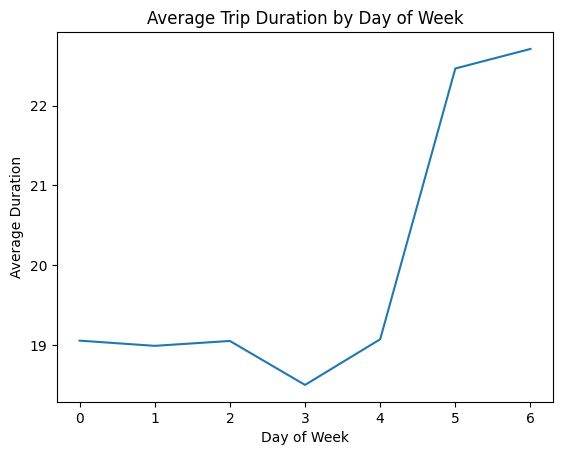

In [ ]:
#Average Trip Duration by Day of Week

# Calculate the average trip duration for each day of the week
average_duration = data.groupby('PDweek')['Duration'].mean()
print(average_duration)

plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

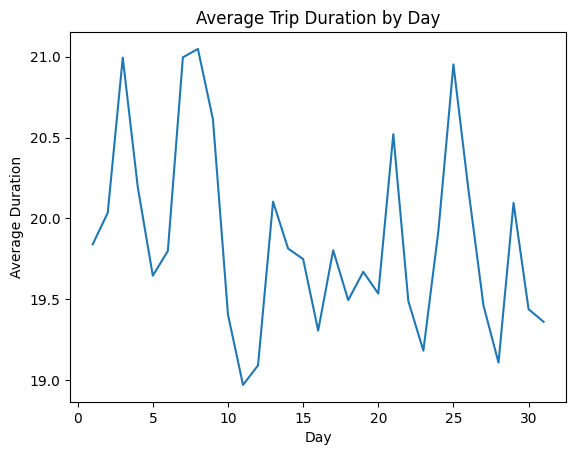

In [ ]:
# Average Trip Duration by Day
average_duration = data.groupby('Pday')['Duration'].mean()

plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Day')
plt.ylabel('Average Duration')
plt.title('Average Trip Duration by Day')
plt.show()

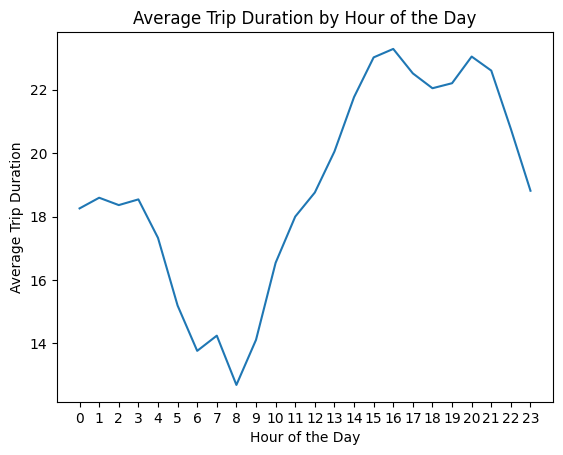

In [ ]:
#Average Trip Duration by Hour of the Day
average_duration = data.groupby('Phour')['Duration'].mean()

plt.plot(average_duration.index, average_duration.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of the Day')
plt.xticks(range(24))
plt.show()

In [21]:
# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(data['Pmonth']).sort_index()
dow_usage = pd.value_counts(data['PDweek']).sort_index()
hour_usage = pd.value_counts(data['Phour']).sort_index()

<ipython-input-22-6e7e0c1e155f>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  figure = plt.subplot(2, 1, 2)


There were a total of 8646056 Rental Bike pickups made


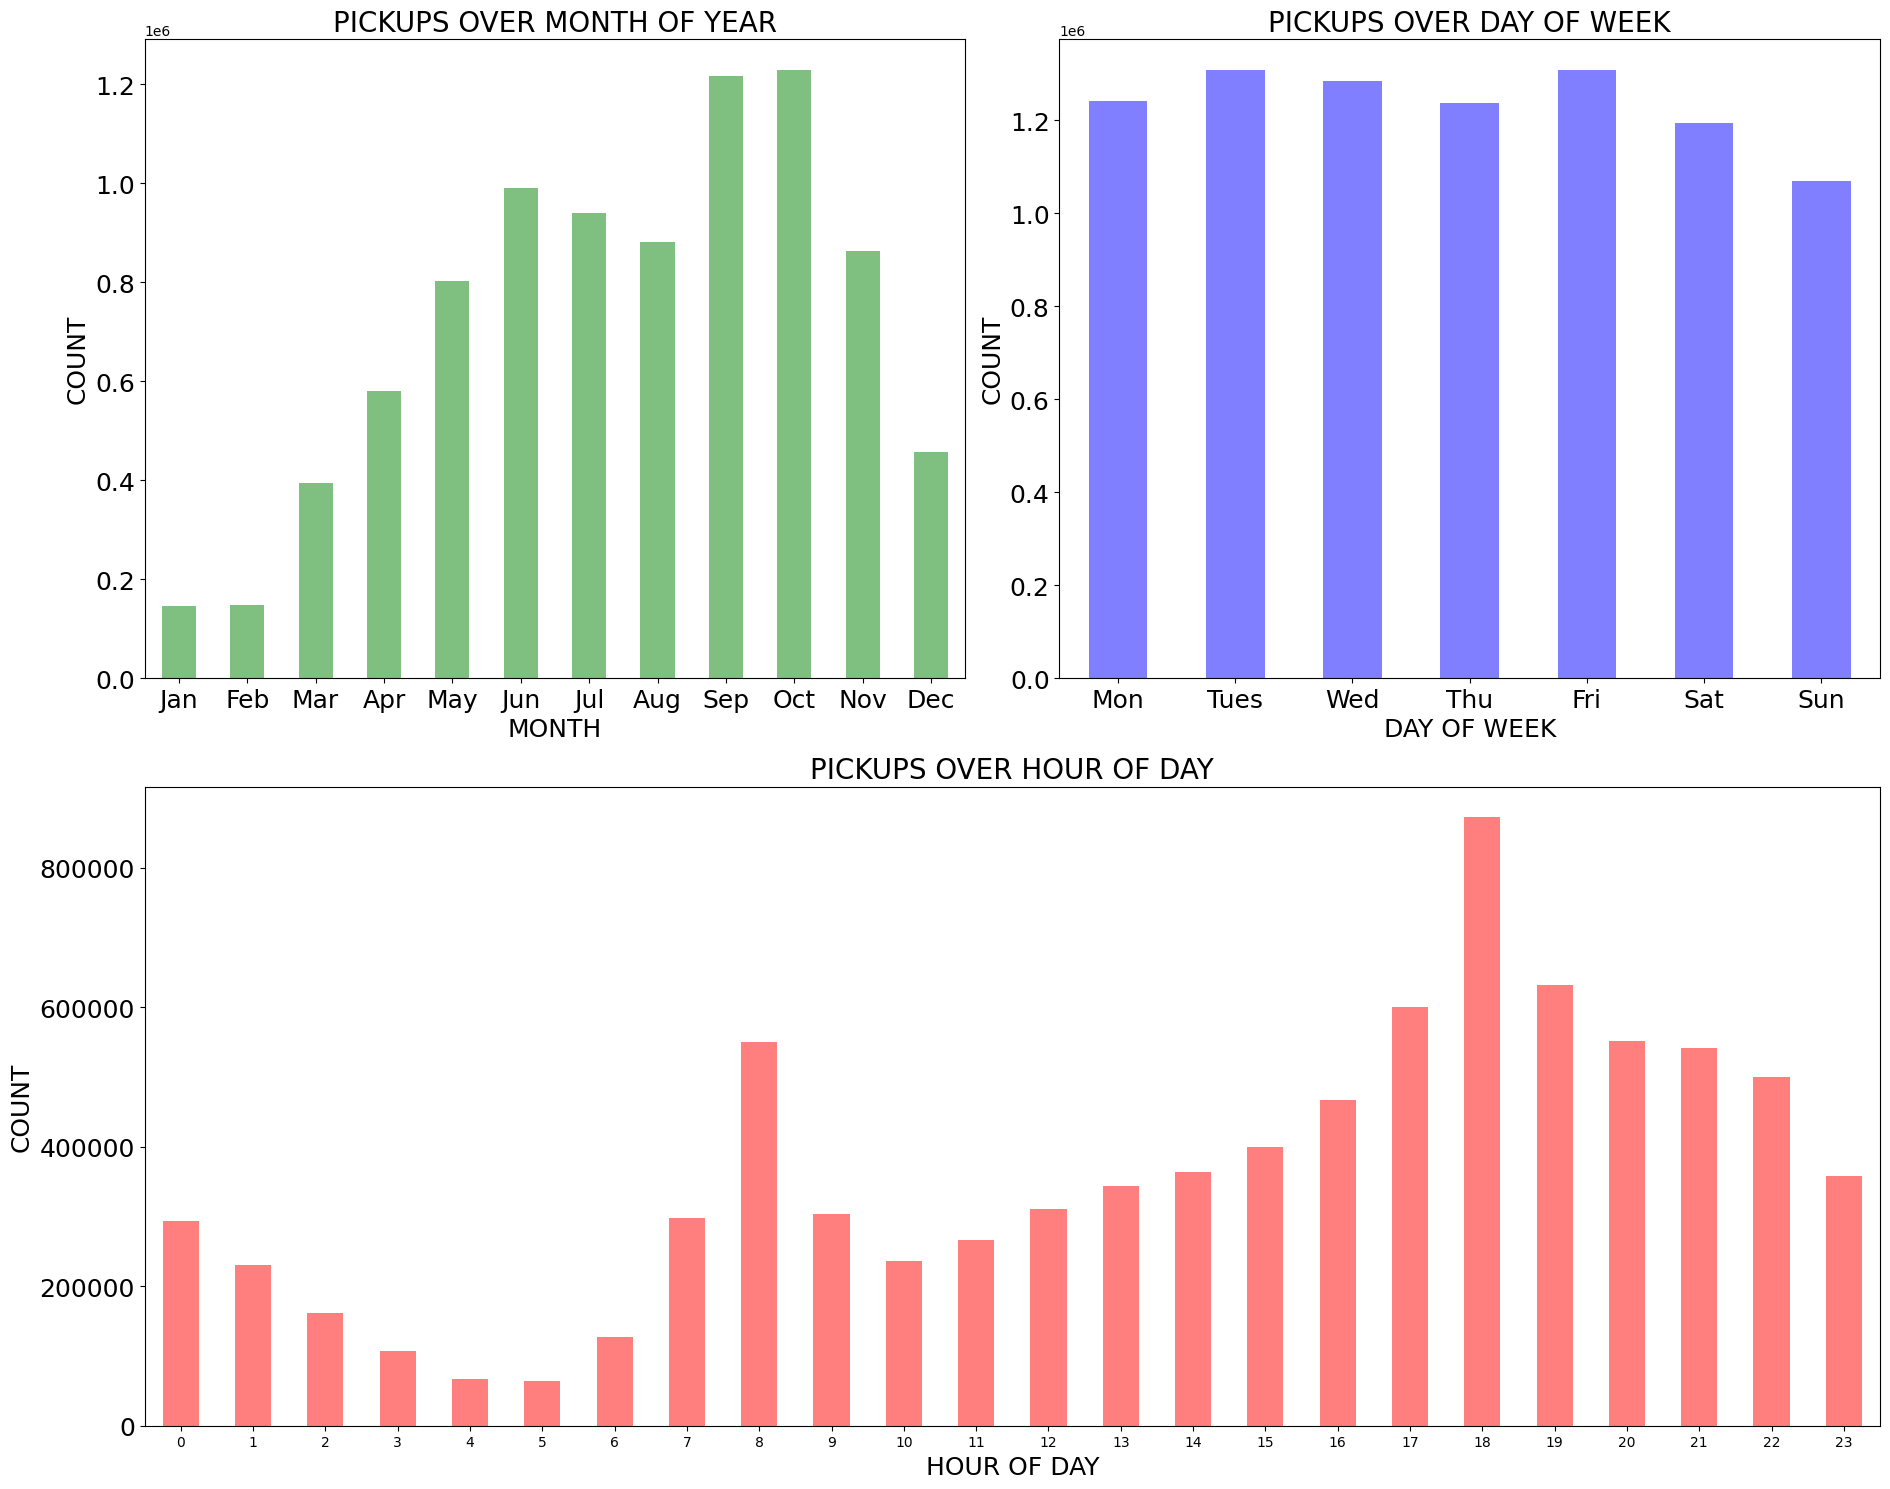

In [22]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))

figure = plt.subplot(2, 2, 1)
month_usage.plot.bar(alpha = 0.5, color = 'green')
plt.title('PICKUPS OVER MONTH OF YEAR', fontsize = 20)
plt.xlabel('MONTH', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(month_usage.index - 1, x_tick_labels_month, rotation=90, fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 2, 2)
dow_usage.plot.bar(alpha = 0.5, color = 'blue')
plt.title('PICKUPS OVER DAY OF WEEK', fontsize = 20)
plt.xlabel('DAY OF WEEK', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(dow_usage.index, x_tick_labels_day, rotation=90, fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
hour_usage.plot.bar(alpha = 0.5, color = 'red')
plt.title('PICKUPS OVER HOUR OF DAY', fontsize = 20)
plt.xlabel('HOUR OF DAY', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
# print the total number of Taxi pickups
print ("There were a total of %d Rental Bike pickups made" % (len(data)))

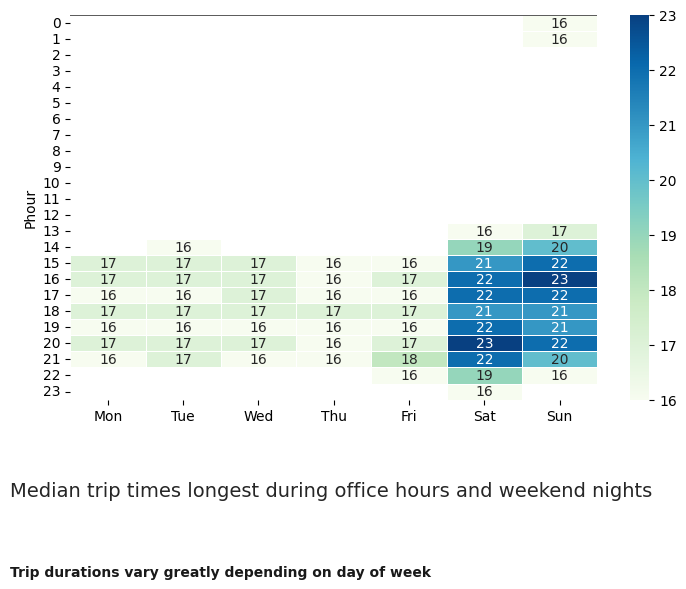

In [19]:
Duration_median = data['Duration'].median()
plt.figure(figsize=(8.5,5))
Phourday = data.groupby(['Phour','PDweek'])['Duration'].median().unstack()
hourday_graph = sns.heatmap(Phourday[Phourday>Duration_median],
                                   lw = .5, annot = True, cmap = 'GnBu', fmt = 'g',annot_kws = {"size":10} )
# Customize tick label size
hourday_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)

# Customize tick labels of the y-axis
hourday_graph.set_xticklabels(labels = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])

# Bolding horizontal line at y = 0
hourday_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
hourday_graph.xaxis.label.set_visible(False)

# # Adding a title and a subtitle
hourday_graph.text(x =-.8, y = 35, s = "Trip durations vary greatly depending on day of week",
               fontsize =10 , weight = 'bold', alpha = .90)
hourday_graph.text(x =-.8, y = 30,
               s = 'Median trip times longest during office hours and weekend nights',
              fontsize = 14, alpha = .85)
plt.show()

### Observations

- From Total pick ups every month in a year plot, more number of pick ups happen during January and February months.

- From Average trip duration in each Month plot. The average trip duration is less during months November, December, January and February since this is the period of time in which South Korea experiences winter season.

This shows that the duration is affected by the temperature.

- From Average trip duration vs each Day of a Week plot, we can observe that the average trip duration is high during weekends

- From Average trip duration vs each hour of the day plot, the average trip duration is high during 15th, 10th and 20th hours of the day.

**From the above observations we can say that temperature and time as influential factors for trip duration estimation.**

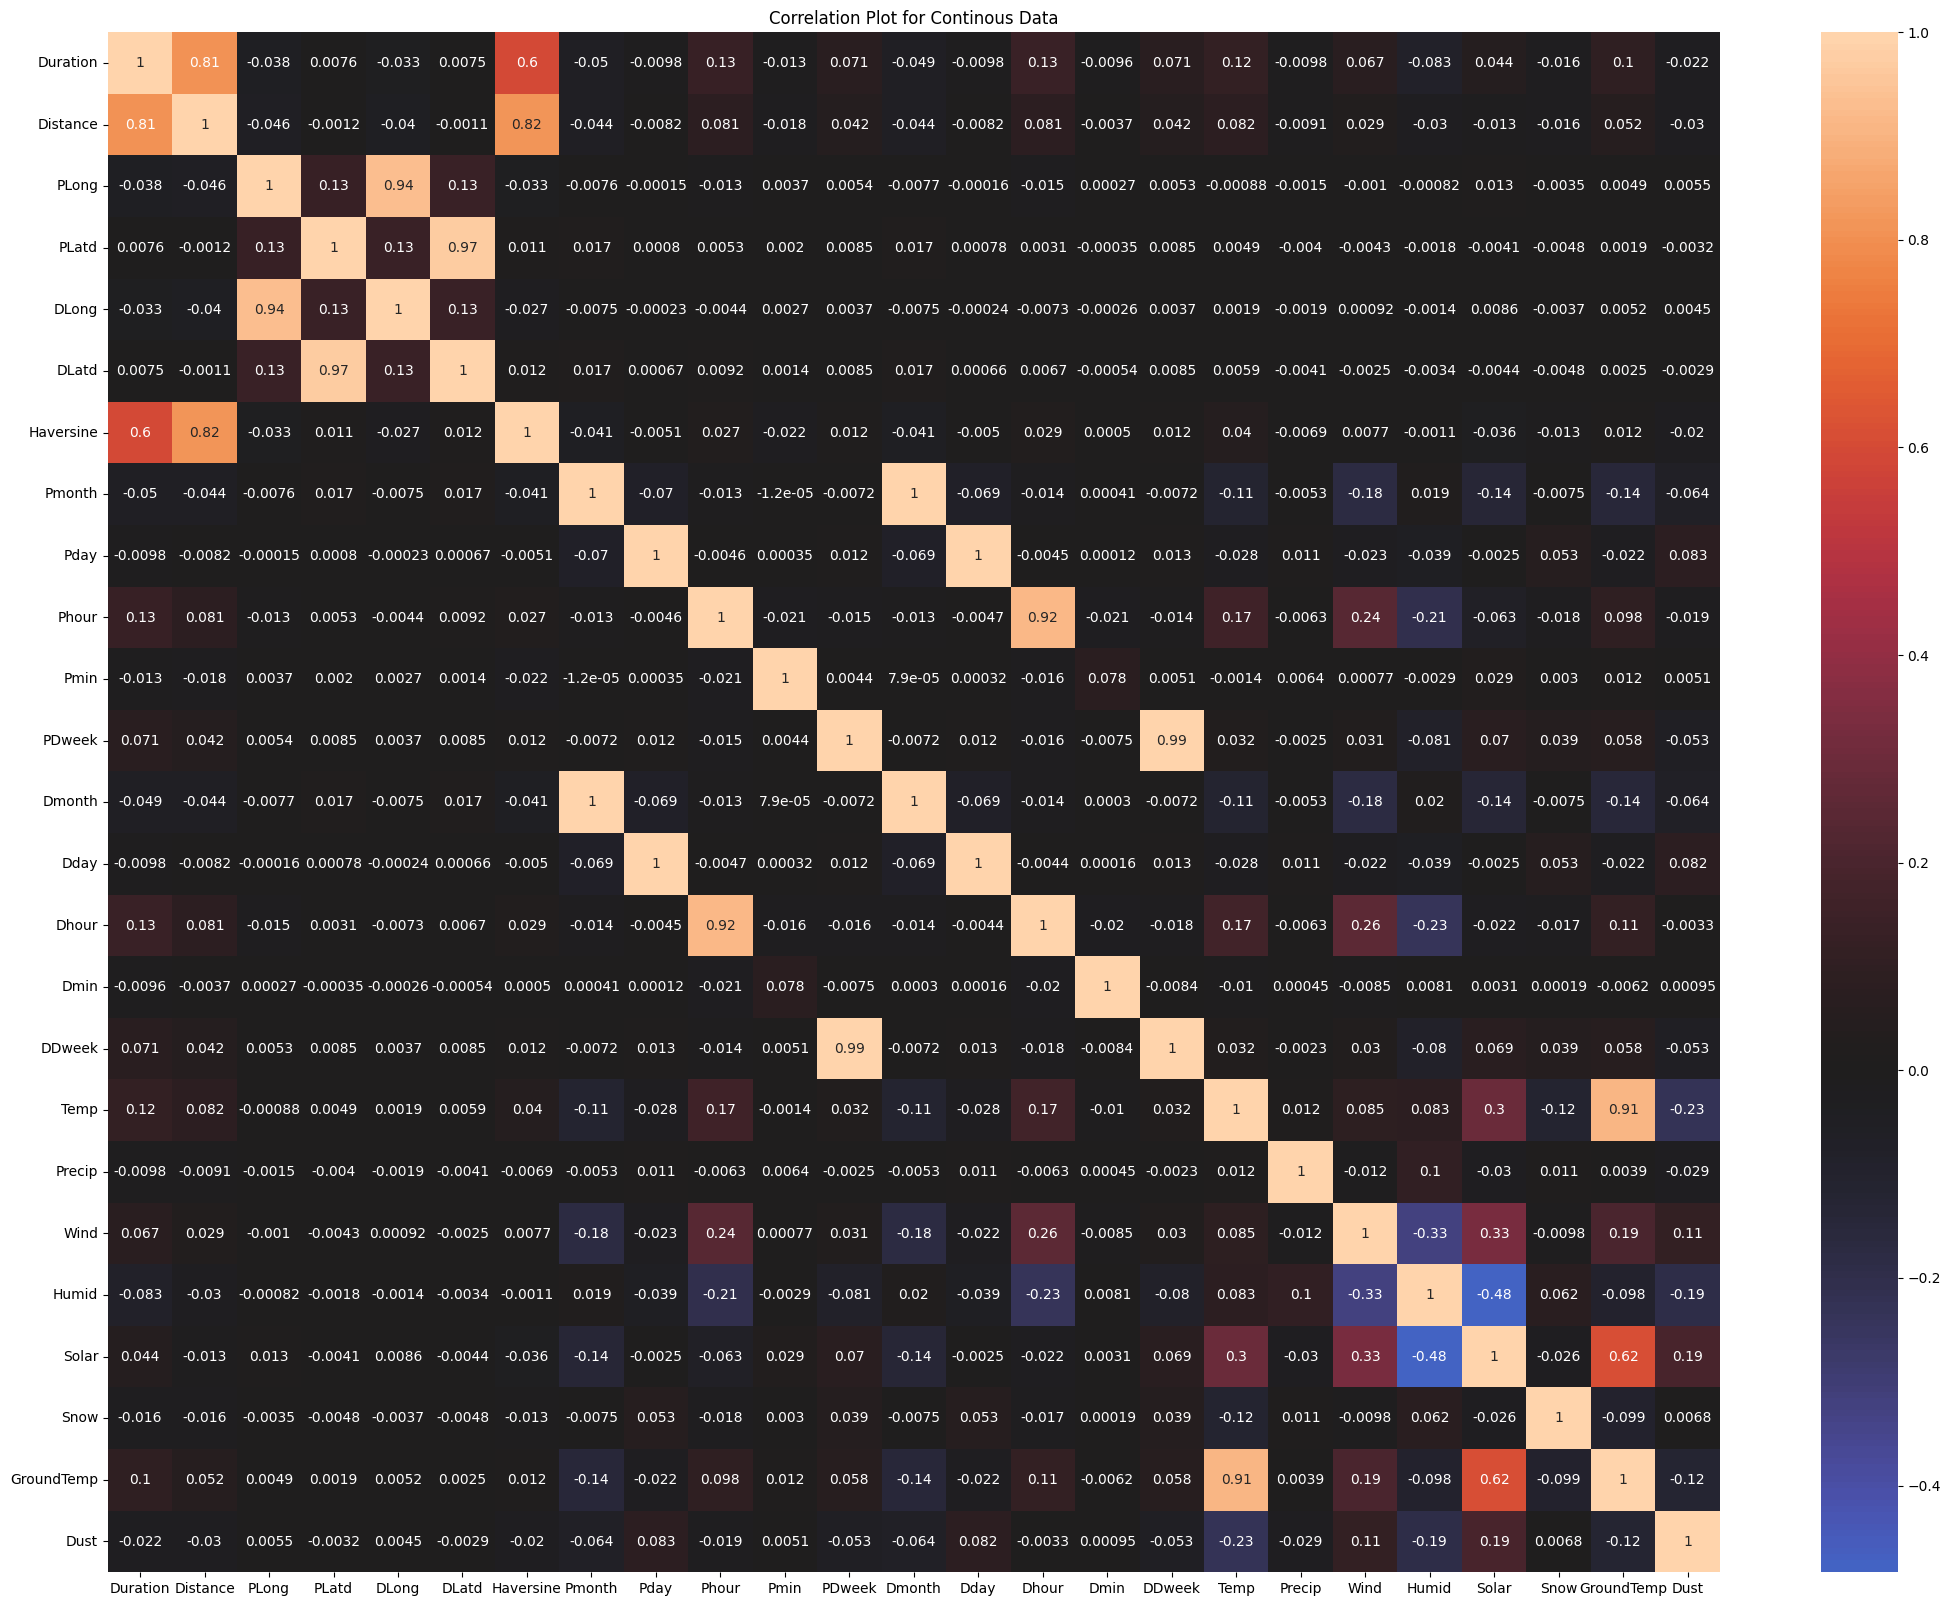

In [ ]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(), annot=True, center=0)
plt.title("Correlation Plot for Continous Data")
plt.show()

In [ ]:
# Separating into continuous and categorical columns

continuous_data_columns =[column_name for column_name in data.columns if data[column_name].nunique()>35]
categorical_data_columns =[column_name for column_name in data.columns if column_name not in continuous_data_columns]

print("Continuous Data Columns : ", continuous_data_columns)
print("Categorical Data Columns : ", categorical_data_columns)

Continuous Data Columns :  ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
Categorical Data Columns :  ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


We have separated on the basis of how many different values there are. If there are more than 35 values, they are considered continuous since the number of days in a month can go upto 31.

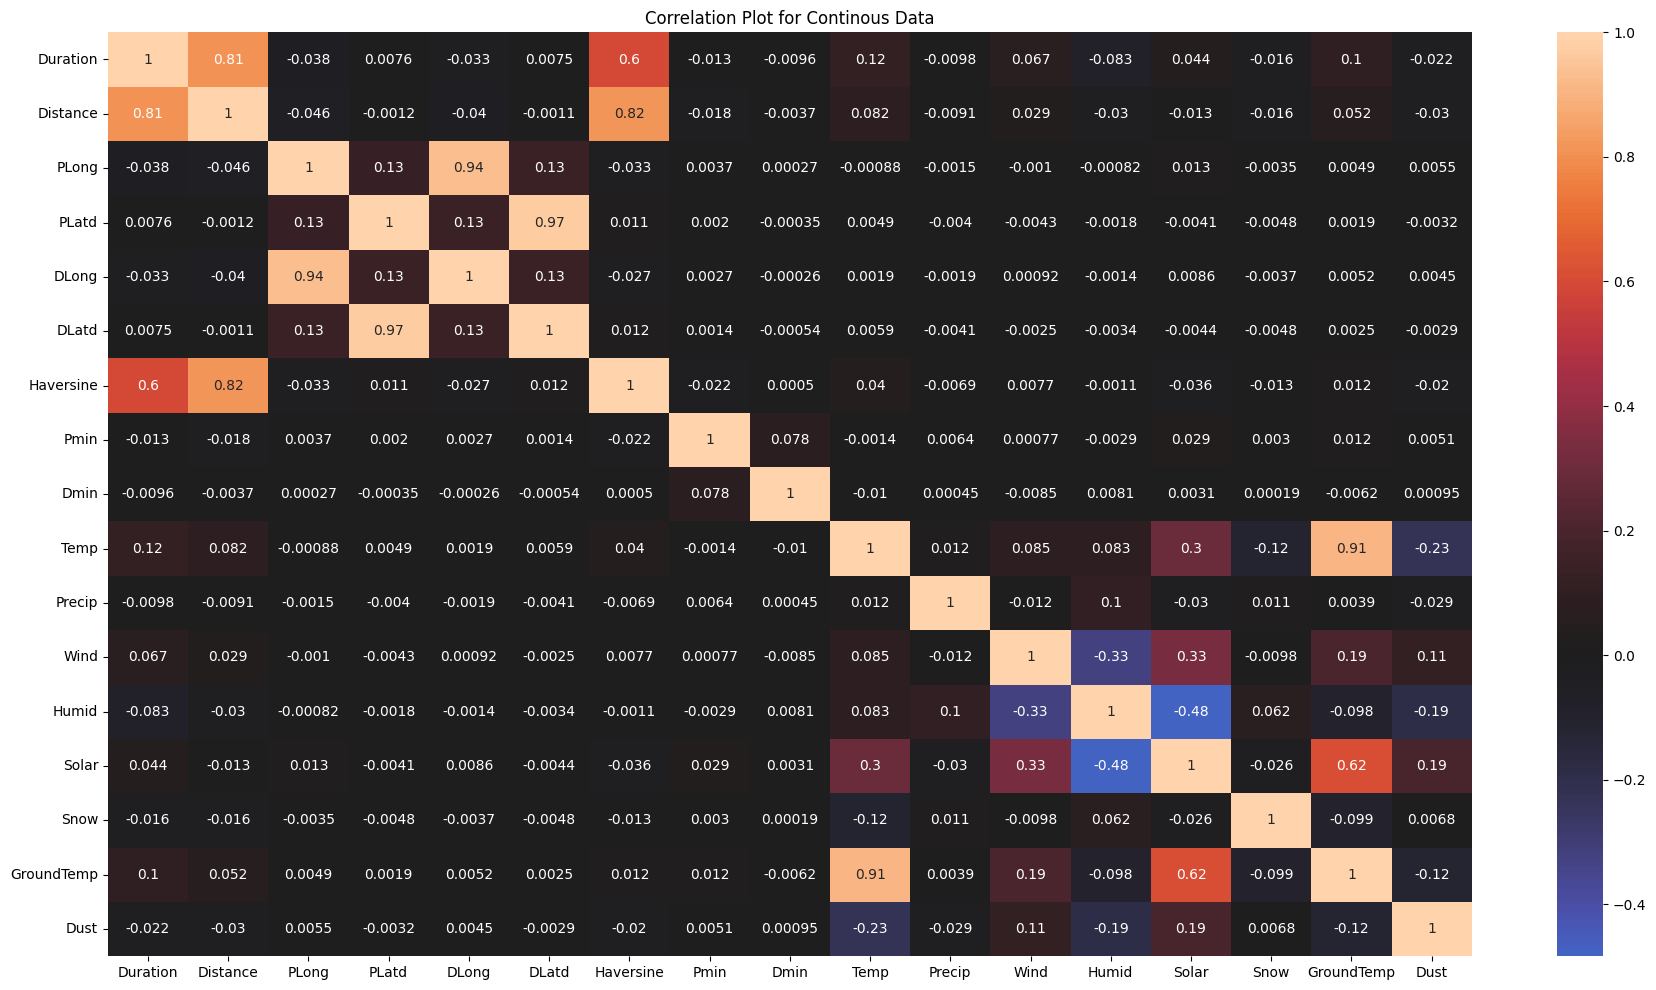

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(data[continuous_data_columns].corr(), annot=True, center=0)
plt.title("Correlation Plot for Continous Data")
plt.show()

Observations:

*   Temp and GroundTemp are highly correlated.
*   Duration is correlated to the Haversine distance which makes sense as it a measure of how far the pickup and dropoff locations are.





In [ ]:
#Saving the cleaned data so we can use it directly next time

#data.to_csv('cleaned_seoul_bike_data.csv', index=False)

# Training and Testing

In [ ]:
#Run this if you want to start with thr cleaned data directly
data = pd.read_csv("cleaned_seoul_bike_data.csv")

In [ ]:
#Splitting into train and test sets
X_train,X_test, y_train, y_test = train_test_split(data.drop(columns=['Duration']), data['Duration'], test_size=0.25, random_state=50)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6437895, 24) (6437895,)
(2145965, 24) (2145965,)


In [ ]:
#Functions for metrics
def rmse(y_true, predictions):
    return np.sqrt(mean_squared_error(y_true, predictions))

def get_metrics(y_true, predictions):
    print(f"MAE: {mean_absolute_error(y_true, predictions)}")
    print(f"MSE: {mean_squared_error(y_true, predictions)}")
    print(f"RMSE: {rmse(y_true, predictions)}")
    print(f"R2 Score: {r2_score(y_true, predictions)}")

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Linear Regression

In [ ]:
%%time
#Lrg model

lrg = LinearRegression()
lrg.fit(scaled_X_train, y_train)

CPU times: user 11.3 s, sys: 5.22 s, total: 16.5 s
Wall time: 14.9 s


LinearRegression()

In [ ]:
#Prediction on test data
lrg_preds=lrg.predict(scaled_X_test)
get_metrics(y_test, lrg_preds)

MAE: 12.10856862980549
MSE: 348.74375462181473
RMSE: 18.674682182618657
R2 Score: 0.3324421704385663


In [ ]:
#Prediction on training data
preds =lrg.predict(scaled_X_train)
get_metrics(y_train, preds)

MAE: 12.118005951276903
MSE: 349.39160303033935
RMSE: 18.692019768616213
R2 Score: 0.33169198954485146


In [ ]:
lrg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

From the metrics, we can see that Linear Regression is not a good model for this problem as MAE, MSE and RMSE are very high. Also, the R2 Score which is an indication of fit is very low.

### XGBoost Regressor

In [ ]:
%%time
from xgboost import XGBRegressor
xgb_model =XGBRegressor(random_state=24)
xgb_model.fit(X_train, y_train)

CPU times: user 4min 59s, sys: 7.27 s, total: 5min 6s
Wall time: 3min 19s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=24, ...)

In [ ]:
#Prediction on test data
preds_xgb=xgb_model.predict(X_test)
get_metrics(y_test, preds_xgb)

MAE: 2.7922699835776004
MSE: 25.865829049657727
RMSE: 5.085845952214609
R2 Score: 0.9504881837413225


In [ ]:
#Prediction on train data
xgb_preds=xgb_model.predict(X_train)
get_metrics(y_train, xgb_preds)

MAE: 2.7775935866857497
MSE: 25.326316998740396
RMSE: 5.032525906415226
R2 Score: 0.9515564187038723


In [ ]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 24,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Using the default hyperparameters of XGBoost Regressor, we achieve pretty good results with the MAE, MSE and the RMSE being significantly lower than the previous model and the fit is also very good.

The metrics on training and testing data are similar indicating that there is no over-fitting or under-fitting.

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(scaled_X_train, y_train)

In [ ]:
test_pred = tree_regressor.predict(scaled_X_test)
get_metrics(y_test,test_pred)

MAE: 1.8705096153323406
MSE: 31.983547041903197
RMSE: 5.655399812736779
R2 Score: 0.938777778922171


In [ ]:
train_pred = tree_regressor.predict(scaled_X_train)
get_metrics(y_train,train_pred)

MAE: 0.0004782619163562003
MSE: 0.0006221754160327251
RMSE: 0.024943444349823162
R2 Score: 0.9999988099175514


In [ ]:
tree_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

The results of Decision Tree classifier with the default hyperparameters are similar on testing data but very good on training data itself. This indicates that there is a high chance of overfitting.

With these models we can already stop with satisfactory results but to find the best models with even better performance, we can tune hyperparameters.

# Hyperparameter Tuning

We only need to tune XGBRegressor and Decision Tree regressor models as there are no hyperparameters to be tuned in a Linear Regression model.

Also, we have a good sense of the range of the hyperparameters. So we can use Grid Search for tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

### XGBRegressor

In [ ]:
xgb_grid = { 'n_estimators': list(range(80, 120, 10)), 'learning_rate': [0.001, 0.01, 0.1]}

In [ ]:
%%time
xgb_reg = XGBRegressor(random_state=24, n_jobs=-1)
xgb_grid_search = GridSearchCV(
    xgb_reg,
    param_grid= xgb_grid,
    cv=3,
    verbose=0,
    n_jobs=-1
)

xgb_grid_search.fit(scaled_X_train, y_train)

Wall time: 12min 4s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [ ]:
print("Best Hyperparameters:", xgb_grid_search.best_params_)

# Evaluate the best model on your test data
best_xgb_model = xgb_grid_search.best_estimator_

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 110}


In [ ]:
#Prediction on test data
preds_xgb=best_xgb_model.predict(scaled_X_test)
get_metrics(y_test, preds_xgb)

MAE: 4.570165303856726
MSE: 75.02067848359027
RMSE: 8.661447828370859
R2 Score: 0.8563970232096623


In [ ]:
#Prediction on train data
xgb_preds=best_xgb_model.predict(scaled_X_train)
get_metrics(y_train, xgb_preds)

MAE: 4.559719939337199
MSE: 74.42615694922034
RMSE: 8.627059577238374
R2 Score: 0.8576394039090947


### Decision Tree Regressor

In [ ]:
tree_grid = {'max_depth': [10,12,14],'max_features': [12,15,20]}

In [ ]:
%%time
tree_reg = DecisionTreeRegressor()
tree_grid_search = GridSearchCV(
    tree_reg,
    param_grid= tree_grid,
    cv=3,
    verbose=0,
    n_jobs=-1
)

tree_grid_search.fit(scaled_X_train, y_train)

Wall time: 9min 41s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14],
                         'max_features': [12, 15, 20]})

In [ ]:
print("Best Hyperparameters:", tree_grid_search.best_params_)

# Evaluate the best model on your test data
best_tree_model = tree_grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 14, 'max_features': 20}


In [ ]:
#Prediction on test data
preds_tree=best_tree_model.predict(scaled_X_test)
get_metrics(y_test, preds_tree)

MAE: 8.645165031023573
MSE: 208.06524169386066
RMSE: 14.424466773293933
R2 Score: 0.6017259683891684


In [ ]:
#Prediction on train data
tree_preds=best_tree_model.predict(scaled_X_train)
get_metrics(y_train, tree_preds)

MAE: 8.58006363638936
MSE: 205.88633018711164
RMSE: 14.348739672428085
R2 Score: 0.6061854878197737


# Conclusion

**According to our preferred metric we can use the two of the following models:**

*   If our focus is on RMSE and want to avoid any chance of overfitting, we can choose the XGBRegressor with default hyperparameters.
*   If we want a better fit (R2 score) at the cost of possibly having an overfit model, we may want to use the DecisionTreeRegressor with the default parameters.

**Note:**


*   Due to computational limitations (Google Colab stopped running after certain RAM limit was reached), hyperparameter tuning possibly yielded sub-optimal results as compared to the default values. A more extensive search may yield better results.



